<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

An examination of trends in SAT and ACT participation rates along with aggregate scores for 2017 and 2018. Participation rates for these tests vary greatly by state, I aim to uncover underlying patterns in order to make recommendations for a suitable states to improve SAT participation rates.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data


The data used for this project are from the following sources:
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges


# Part 2

Part 2 requires knowledge of Pandas, EDA, Data Cleaning, and Data Visualization.

## Data Import

In [14]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
from pandas.api.types import is_numeric_dtype

# Visual Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [20]:
sat_df_2017 = pd.read_csv('./sat_2017.csv')
act_df_2017 = pd.read_csv('./act_2017.csv')
sat_df_2018 = pd.read_csv('./sat_2018.csv')
act_df_2018 = pd.read_csv('./act_2018.csv')

In [21]:
sat_df_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [22]:
# Check for missing values
  # No missing values

sat_df_2017.isna().any().any()

False

In [23]:
sat_df_2017.shape

(51, 5)

In [24]:
sat_df_2017.info

<bound method DataFrame.info of                    State Participation  Evidence-Based Reading and Writing  \
0                Alabama            5%                                 593   
1                 Alaska           38%                                 547   
2                Arizona           30%                                 563   
3               Arkansas            3%                                 614   
4             California           53%                                 531   
5               Colorado           11%                                 606   
6            Connecticut          100%                                 530   
7               Delaware          100%                                 503   
8   District of Columbia          100%                                 482   
9                Florida           83%                                 520   
10               Georgia           61%                                 535   
11                Hawaii        

In [25]:
sat_df_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [26]:
sat_df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [ ]:
# Issues Identified 

#Minimum/maximum score for individual sections of SAT is 200/800. Minimum/maximum score for individual sections of ACT is 1/36. The maximum total score for SAT is 1600 while the maximum total score of ACT is 36.

#The SAT math score for Maryland is suspiciously low and upon checking with the source, it was discovered that the score was entered errorneously as 52 instead of 524.

In [27]:
# Fixing the issue 

sat_df_2017['Math'].replace(52, 524, inplace=True)


In [28]:
# Data Types 

sat_df_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [29]:
act_df_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [30]:
# Check for missing values
  # No missing values

act_df_2017.isna().any().any()

False

In [31]:
act_df_2017.shape

(52, 7)

In [32]:
act_df_2017.info

<bound method DataFrame.info of                    State Participation  English  Math  Reading  Science  \
0               National           60%     20.3  20.7     21.4     21.0   
1                Alabama          100%     18.9  18.4     19.7     19.4   
2                 Alaska           65%     18.7  19.8     20.4     19.9   
3                Arizona           62%     18.6  19.8     20.1     19.8   
4               Arkansas          100%     18.9  19.0     19.7     19.5   
5             California           31%     22.5  22.7     23.1     22.2   
6               Colorado          100%     20.1  20.3     21.2     20.9   
7            Connecticut           31%     25.5  24.6     25.6     24.6   
8               Delaware           18%     24.1  23.4     24.8     23.6   
9   District of Columbia           32%     24.4  23.5     24.9     23.5   
10               Florida           73%     19.0  19.4     21.0     19.4   
11               Georgia           55%     21.0  20.9     22.0     2

In [33]:
act_df_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [34]:
act_df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


# Issues Identified 

Minimum/maximum score for individual sections of SAT is 200/800. Minimum/maximum score for individual sections of ACT is 1/36. The maximum total score for SAT is 1600 while the maximum total score of ACT is 36.

The ACT science score for Maryland is also much lower than usual. Upon checking with the source, it was discovered that the score was entered errorneously as 2.3 instead of 23.2.

In [35]:
# Fixing the issue 

act_df_2017['Science'].replace(2.3, 23.2, inplace=True)

In [36]:
# Data Types 

act_df_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [37]:
sat_df_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [38]:
# Check for missing values
  # No missing values

sat_df_2018.isna().any().any()

False

In [39]:
sat_df_2018.info

<bound method DataFrame.info of                    State Participation  Evidence-Based Reading and Writing  \
0                Alabama            6%                                 595   
1                 Alaska           43%                                 562   
2                Arizona           29%                                 577   
3               Arkansas            5%                                 592   
4             California           60%                                 540   
5               Colorado          100%                                 519   
6            Connecticut          100%                                 535   
7               Delaware          100%                                 505   
8   District of Columbia           92%                                 497   
9                Florida           56%                                 550   
10               Georgia           70%                                 542   
11                Hawaii        

In [40]:
sat_df_2018.shape

(51, 5)

In [41]:
sat_df_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [42]:
sat_df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


In [43]:
# Data Types 

sat_df_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [44]:
act_df_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [45]:
# Check for missing values
  # No missing values
act_df_2018.isna().any().any()

False

In [46]:
act_df_2018.shape

(52, 3)

In [47]:
act_df_2018.info

<bound method DataFrame.info of                    State Participation  Composite
0                Alabama          100%       19.1
1                 Alaska           33%       20.8
2                Arizona           66%       19.2
3               Arkansas          100%       19.4
4             California           27%       22.7
5               Colorado           30%       23.9
6            Connecticut           26%       25.6
7               Delaware           17%       23.8
8   District of columbia           32%       23.6
9                Florida           66%       19.9
10               Georgia           53%       21.4
11                Hawaii           89%       18.9
12                 Idaho           36%       22.3
13              Illinois           43%       23.9
14               Indiana           32%       22.5
15                  Iowa           68%       21.8
16                Kansas           71%       21.6
17              Kentucky          100%       20.2
18             Lou

In [48]:
act_df_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [49]:
act_df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Composite,52.0,21.544231,2.119417,17.7,19.975,21.3,23.725,25.6


In [50]:
# Data Types 

act_df_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [58]:
# Defining a function to convert this to floats using .map() or .apply()

def percent_str_to_float(x):  
    
    if isinstance(x,str) == True:    
        x = x.replace('%','')
        x = x.replace(')','')
        
    x = float(x)/100
        
    return x

In [60]:
col_name = 'Participation'

sat_df_2017[col_name] = sat_df_2017[col_name].apply(percent_str_to_float)

In [62]:
act_df_2017[col_name] = act_df_2017[col_name].apply(percent_str_to_float)

In [63]:
sat_df_2018[col_name] = sat_df_2018[col_name].apply(percent_str_to_float)

In [64]:
act_df_2018[col_name] = act_df_2018[col_name].apply(percent_str_to_float)

In [65]:
# Change of Data types

sat_df_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [66]:
# Change of Data types

act_df_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [67]:
# Change of Data types

sat_df_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [68]:
# Change of Data types

act_df_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [69]:
#Renaming Columns 

sat_df_2017.rename(columns={'State': 'state', 
                       'Participation': 'participation_2017', 
                       'Evidence-Based Reading and Writing': 'ebrw_2017', 
                      'Math': 'math_2017', 
                      'Total': 'total_2017'}, inplace=True)

In [70]:
#Renaming Columns 

act_df_2017.rename(columns={'State': 'state', 
                       'Participation': 'participation_2017', 
                       'English': 'english_2017', 
                      'Math': 'math_2017', 
                      'Reading': 'reading_2017', 
                      'Science': 'science_2017',  
                      'Composite': 'composite_2017'}, inplace=True)

In [71]:
#Renaming Columns 

sat_df_2018.rename(columns={'State': 'state', 
                       'Participation': 'participation_2018', 
                       'Evidence-Based Reading and Writing': 'ebrw_2018', 
                      'Math': 'math_2018', 
                      'Total': 'total_2018'}, inplace=True)

In [72]:
#Renaming Columns 

act_df_2018.rename(columns={'State': 'state', 
                       'Participation': 'participation_2018', 
                       'English': 'english_2018', 
                      'Math': 'math_2018', 
                      'Reading': 'reading_2018', 
                      'Science': 'science_2018',  
                      'Composite': 'compo_2018'}, inplace=True)

In [73]:
# Drop Unecessary Rows

sat_df_2017 = sat_df_2017.drop(0)

In [74]:
sat_df_2017.head()

,state,participation_2017,ebrw_2017,math_2017,total_2017
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201


In [75]:
# Drop Unecessary Rows

act_df_2017 = act_df_2017.drop(0)

In [76]:
act_df_2017.head()

,state,participation_2017,english_2017,math_2017,reading_2017,science_2017,composite_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [77]:
# Drop Unecessary Rows

sat_df_2018 = sat_df_2018.drop(0)

In [78]:
sat_df_2018.head()

,state,participation_2018,ebrw_2018,math_2018,total_2018
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025


In [79]:
# Drop Unecessary Rows

act_df_2018 = act_df_2018.drop(0)

In [80]:
act_df_2018.head()

,state,participation_2018,compo_2018
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9


In [86]:
#Merging Data Frames 

sat_df_2017_2018 = pd.merge(sat_df_2017, sat_df_2018, on='state')

In [87]:
sat_df_2017_2018.head()

,state,participation_2017,ebrw_2017,math_2017,total_2017,participation_2018,ebrw_2018,math_2018,total_2018
0,Alaska,0.38,547,533,1080,0.43,562,544,1106
1,Arizona,0.30,563,553,1116,0.29,577,572,1149
2,Arkansas,0.03,614,594,1208,0.05,592,576,1169
3,California,0.53,531,524,1055,0.60,540,536,1076
4,Colorado,0.11,606,595,1201,1.00,519,506,1025


In [93]:
# Export combined dataframe to csv

sat_df_2017_2018.to_csv('.../data/combined_df_2017.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '.../data/combined_df_2017.csv'

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.



|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [94]:
# Summary Statistics

sat_df_2017_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_2017,50.0,0.4050,0.352792,0.02,0.0400,0.405,0.6650,1.0
ebrw_2017,50.0,568.6400,46.001668,482.00,532.7500,558.500,613.5000,644.0
math_2017,50.0,556.5800,47.549798,468.00,523.2500,544.500,601.0000,651.0
total_2017,50.0,1125.3200,93.265134,950.00,1055.2500,1104.500,1214.0000,1295.0
participation_2018,50.0,0.4654,0.372543,0.02,0.0425,0.535,0.7825,1.0
ebrw_2018,50.0,563.0600,47.771740,480.00,534.2500,551.000,612.7500,643.0
math_2018,50.0,555.9400,48.210597,480.00,522.2500,543.500,594.2500,655.0
total_2018,50.0,1119.1000,94.879354,977.00,1055.2500,1096.000,1207.0000,1298.0


In [95]:
def compute_stdev(col):
    
    if is_numeric_dtype(col) == False:
        return
    
    n = len(col)
    mean = np.mean(col)
    total = 0
    
    for x in col:
        total += (x-mean)**2
        
    variance = total / n
    stdev = np.sqrt(variance)
    
    print(n,mean,stdev)    
    
#return round(stdev,2)
    return stdev

In [96]:
sd = {col:compute_stdev(satdf_2017_2018[col]) for col in satdf_2017_2018 if col != 'state'}

50 0.405 0.34924633140521316
50 568.64 45.539328058283864
50 556.58 47.07189819839434
50 1125.32 92.32777263640664
50 0.4653999999999999 0.36879918655007904
50 563.06 47.29161024959924
50 555.94 47.72605577669287
50 1119.1 93.9257685622002


In [97]:
sd

{'participation_2017': 0.34924633140521316,
 'ebrw_2017': 45.539328058283864,
 'math_2017': 47.07189819839434,
 'total_2017': 92.32777263640664,
 'participation_2018': 0.36879918655007904,
 'ebrw_2018': 47.29161024959924,
 'math_2018': 47.72605577669287,
 'total_2018': 93.9257685622002}

In [98]:
# SAT 2017 highest participation rates

satdf_2017_2018.sort_values(by=['participation_2017'],ascending=False)[['state', 'participation_2017']].head()

,state,participation_2017
5,Connecticut,1.00
6,Delaware,1.00
7,District of Columbia,1.00
21,Michigan,1.00
28,New Hampshire,0.96


In [99]:
# SAT 2017 highest participation rates

satdf_2017_2018.sort_values(by=['participation_2017'])[['state', 'participation_2017']].head()

,state,participation_2017
33,North Dakota,0.02
23,Mississippi,0.02
14,Iowa,0.02
24,Missouri,0.03
43,Utah,0.03


In [100]:
# SAT 2018 lowest participation rates

satdf_2017_2018.sort_values(by=['participation_2018'],ascending=False)[['state', 'participation_2018']].head()

,state,participation_2018
4,Colorado,1.0
5,Connecticut,1.0
6,Delaware,1.0
21,Michigan,1.0
11,Idaho,1.0


In [101]:
# SAT 2018 lowest participation rates

satdf_2017_2018.sort_values(by=['participation_2018'])[['state', 'participation_2018']].head()

,state,participation_2018
33,North Dakota,0.02
49,Wyoming,0.03
40,South Dakota,0.03
26,Nebraska,0.03
48,Wisconsin,0.03


In [102]:
#2017 SAT higest total score

satdf_2017_2018.sort_values(by=['total_2017'],ascending=False)[['state', 'total_2017']].head()

,state,total_2017
22,Minnesota,1295
48,Wisconsin,1291
14,Iowa,1275
24,Missouri,1271
15,Kansas,1260


In [103]:
#2017 SAT lowest total score

satdf_2017_2018.sort_values(by=['total_2017'])[['state', 'total_2017']].head()

,state,total_2017
7,District of Columbia,950
6,Delaware,996
11,Idaho,1005
21,Michigan,1005
18,Maine,1012


In [104]:
#2018 SAT higest total score

satdf_2017_2018.sort_values(by=['total_2018'],ascending=False)[['state', 'total_2018']].head()

,state,total_2018
22,Minnesota,1298
48,Wisconsin,1294
33,North Dakota,1283
14,Iowa,1265
15,Kansas,1265


In [105]:
#2018 SAT lowest total score

satdf_2017_2018.sort_values(by=['total_2018'])[['state', 'total_2018']].head()

,state,total_2018
7,District of Columbia,977
6,Delaware,998
47,West Virginia,999
11,Idaho,1001
43,Utah,1010


In [106]:
#Year to year participation rate

mask_2017 = (satdf_2017_2018['participation_2017'] > 0.5) & (satdf_2017_2018['participation_2018'] > 0.5)

satdf_2017_2018[mask_2017][['state','participation_2017', 'participation_2018']]

,state,participation_2017,participation_2018
3,California,0.53,0.60
5,Connecticut,1.00,1.00
6,Delaware,1.00,1.00
7,District of Columbia,1.00,0.92
8,Florida,0.83,0.56
9,Georgia,0.61,0.70
10,Hawaii,0.55,0.56
11,Idaho,0.93,1.00
13,Indiana,0.63,0.63
18,Maine,0.95,0.99


## Visualizing the Data


<AxesSubplot:title={'center':'SAT 2017 2018'}>

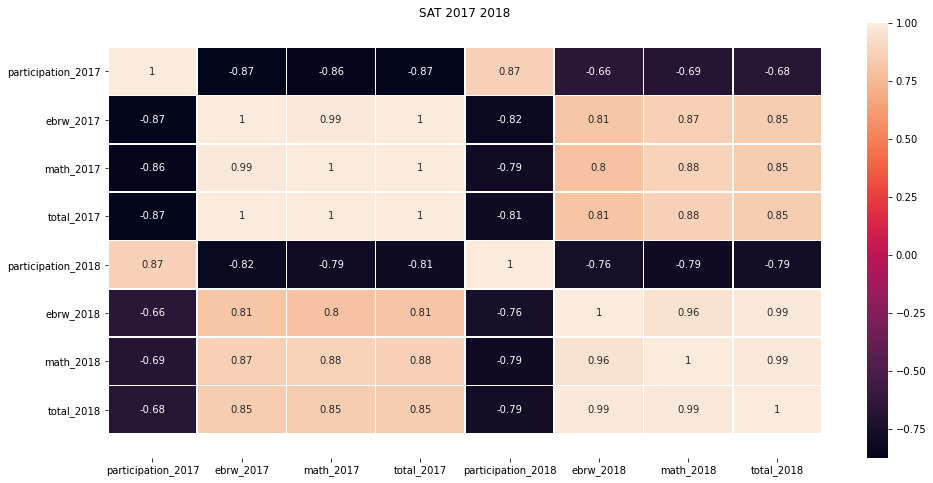

In [107]:
#Heatmap! 

plt.figure(figsize=(16, 8))
plt.title('SAT 2017 2018')

ax = sns.heatmap(satdf_2017_2018.corr(), linewidths=.5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax

In [124]:
# custom function for making histogram subplots

def subplot_histograms(dataframe, list_of_columns,list_of_titles,list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows+2),sharey=True) 
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(list_of_titles[i],fontsize=13)
        ax[i].set_xlabel(list_of_xlabels[i])
        
    plt.tight_layout()

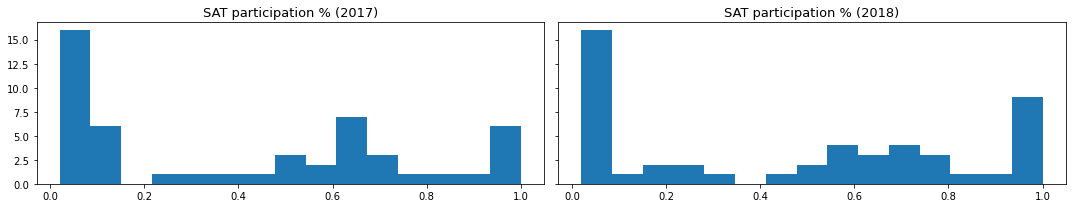

In [125]:
# Histograms: participation rates for SAT 2017 & 2018

participation = ['participation_2017','participation_2018']
titles = ['SAT participation % (2017)','SAT participation % (2018)']
xlabels = ['','']
subplot_histograms(satdf_2017_2018,participation,titles,xlabels)
plt.tight_layout()

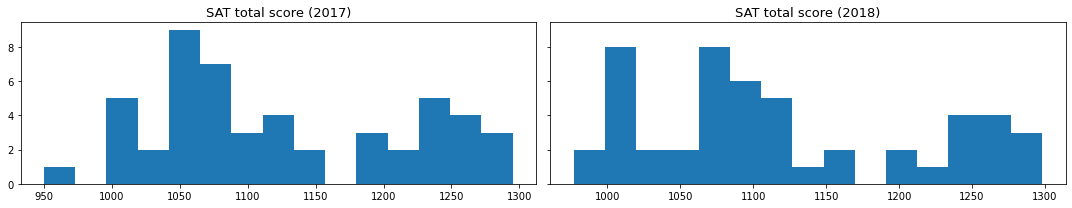

In [126]:
# Histograms: total scores for SAT 2017 & 2018

participation = ['total_2017','total_2018']
titles = ['SAT total score (2017)','SAT total score (2018)']
xlabels = ['','']
subplot_histograms(satdf_2017_2018,participation,titles,xlabels)
plt.tight_layout()

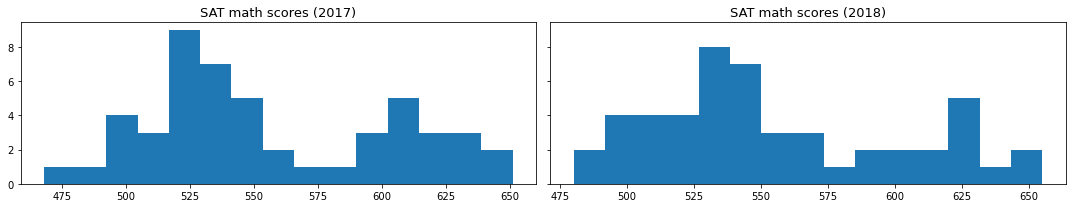

In [127]:
# Histograms: math for SAT 2017 & 2018 

participation = ['math_2017','math_2018']
titles = ['SAT math scores (2017)','SAT math scores (2018)']
xlabels = ['','',]
subplot_histograms(satdf_2017_2018,participation,titles,xlabels)
plt.tight_layout()

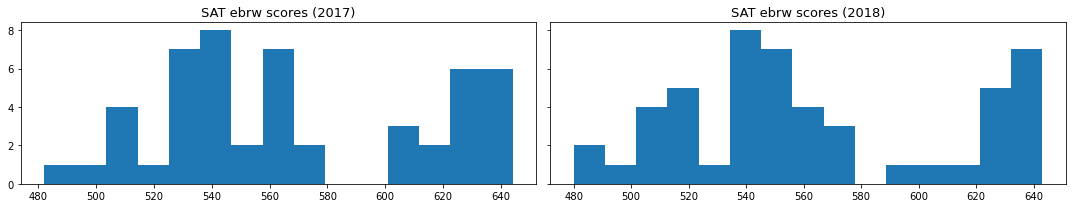

In [128]:
# Histograms: ebrw for SAT 2017 & 2018 

participation = ['ebrw_2017','ebrw_2018']
titles = ['SAT ebrw scores (2017)','SAT ebrw scores (2018)']
xlabels = ['','',]
subplot_histograms(satdf_2017_2018,participation,titles,xlabels)
plt.tight_layout()

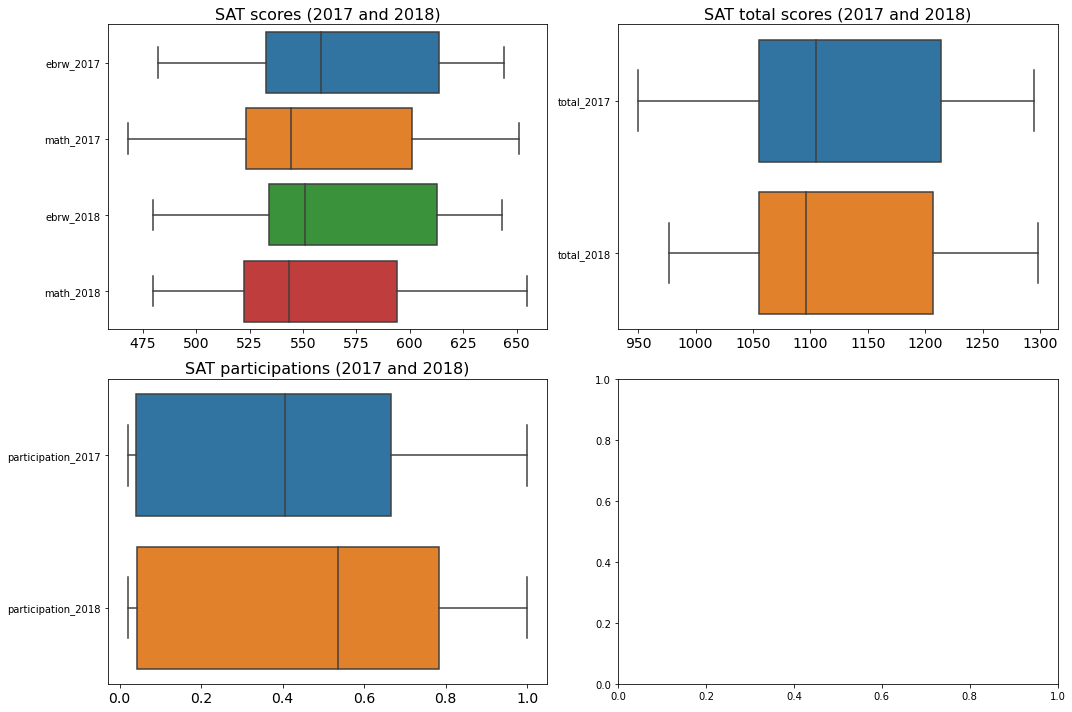

In [152]:
# set lists to split dataframe for plots

sat_scores = ['ebrw_2017','math_2017','ebrw_2018','math_2018']
sat_scores_total = ['total_2017','total_2018']
participation_total = ['participation_2017','participation_2018']

fig, ax = plt.subplots(2,2, figsize=(15, 10)) 

sns.boxplot(data=sat_df_2017_2018[sat_scores],ax = ax[0][0],orient='h')
ax[0][0].set_title('SAT scores (2017 and 2018)',fontsize=16)
plt.setp(ax[0][0].get_xticklabels(), fontsize=14)

sns.boxplot(data=sat_df_2017_2018[sat_scores_total],ax = ax[0][1],orient='h')
ax[0][1].set_title('SAT total scores (2017 and 2018)',fontsize=16)
plt.setp(ax[0][1].get_xticklabels(), fontsize=14)

sns.boxplot(data=sat_df_2017_2018[participation_total],ax = ax[1][0],orient='h')
ax[1][0].set_title('SAT participations (2017 and 2018)',fontsize=16)
plt.setp(ax[1][0].get_xticklabels(), fontsize=14)

plt.tight_layout()

In [115]:
# custom function for drawing scatterplot

def scatterplot(dataframe, col1, col2, title,color=None):
    sns.regplot(dataframe[col1],dataframe[col2],
                scatter_kws={'facecolors':color,'edgecolor':color},
                line_kws = {'color':'red'})
    plt.title(title,fontsize=14)
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


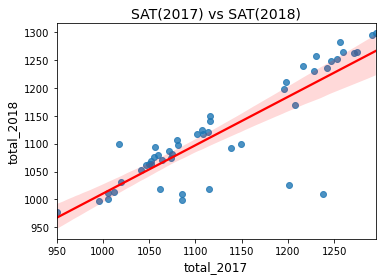

In [116]:
plt.figure(figsize=(10,4))

# Scatterplot: SAT(2017) vs SAT(2018)

plt.subplot(1,2,1)
scatterplot(satdf_2017_2018,'total_2017','total_2018','SAT(2017) vs SAT(2018)')
# Scatterplot: SAT vs ACT (2018)


plt.tight_layout()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


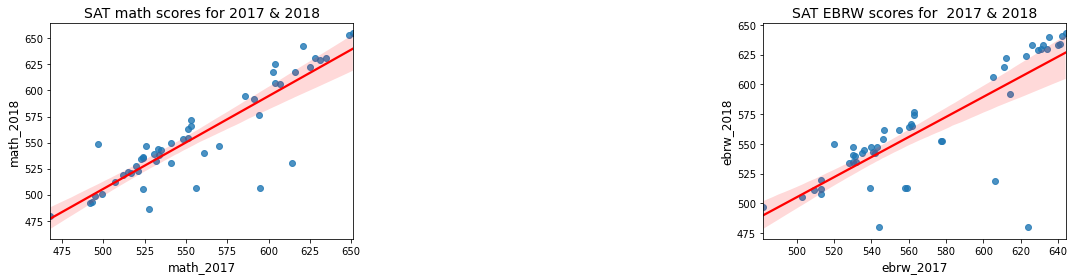

In [117]:
plt.figure(figsize=(15,4))

# Scatterplot: SAT math scores for 2017 & 2018

plt.subplot(1,3,1)
scatterplot(satdf_2017_2018,'math_2017','math_2018','SAT math scores for 2017 & 2018')


# Scatterplot: SAT EBRW scores for  2017 & 2018
plt.subplot(1,3,3)
scatterplot(satdf_2017_2018,'ebrw_2017','ebrw_2018','SAT EBRW scores for  2017 & 2018')

plt.tight_layout()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


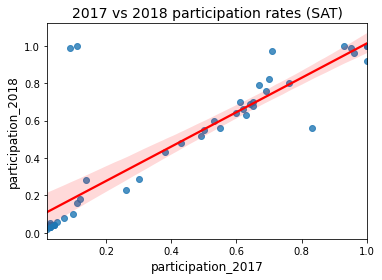

In [118]:
plt.figure(figsize=(10,4))

# Scatterplot: participation rates for SAT 2017 vs.2018
plt.subplot(1,2,1)
scatterplot(satdf_2017_2018,'participation_2017','participation_2018','2017 vs 2018 participation rates (SAT)')

plt.tight_layout()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


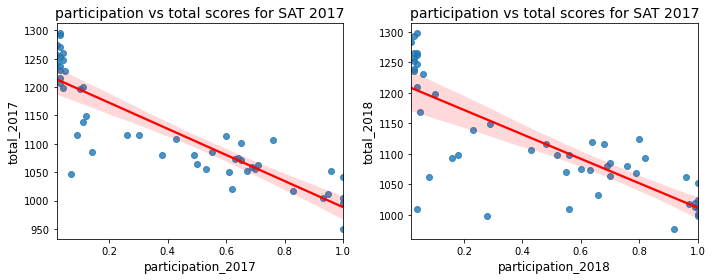

In [119]:
plt.figure(figsize=(10,4))

# Scatterplot: participation vs total scores for SAT 2017
plt.subplot(1,2,1)
scatterplot(satdf_2017_2018,'participation_2017','total_2017','participation vs total scores for SAT 2017')

plt.subplot(1,2,2)
scatterplot(satdf_2017_2018,'participation_2018','total_2018','participation vs total scores for SAT 2017')


plt.tight_layout()

### Conclusion:

From the above anylysis, it is clearly indicated a distinct rivalry between the SAT and ACT participation rates, with ACT clearly leading the race whilst SAT improving over the year with its participation rates.
There is a decrease in total scoring for the SATs in America, but participation rates have somewhat remained consistent. 

North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin, Michigan, Colorado, Connecticut,Delaware and Idaho are states that have the least participating rate for the SATs

There are many states with mandatory ACT and SAT examinations. High participation rates in a particular test usually leads to low scores in the test, as well as low participation rates in the other test.

### Recommendations: 

1)To further encourage the switch to the SAT, free tests should be offered to select schools 
which may be resistant to the idea to help ease the pain of transition and get students accustomed to the SAT.

2) The SAT can be offered for free or discounted to students at both the state level and the
municipal - even if a state doesn't provide for all, individual school districts are able to offer 
free SAT admission for local citizens.

